<a href="https://colab.research.google.com/github/verondel/data_analysis/blob/main/hw_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 3: Предварительная обработка данных и отбор признаков

## libs

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
from numpy import set_printoptions

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

Датасет:


[Heart Attack Analysis & Prediction Dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data)


### dataset info

- `age` - Age of the patient
- `sex` - Sex of the patient
- `cp` - Chest pain type
    - ~ 0 = Typical Angina,
    - 1 = Atypical Angina,
    - 2 = Non-anginal Pain,
    - 3 = Asymptomatic
- `trtbps` - Resting blood pressure (in mm Hg)
- `chol` - Cholestoral in mg/dl fetched via BMI sensor
- `fbs` - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
- `restecg` - Resting electrocardiographic results
  - ~ 0 = Normal,
  - 1 = ST-T wave normality,
  - 2 = Left ventricular hypertrophy
- `thalachh` - Maximum heart rate achieved
- `oldpeak` - Previous peak
- `slp` - Slope
- `caa` - Number of major vessels
- `thall` - Thalium Stress Test result ~ (0,3)
- `exng` - Exercise induced angina ~ 1 = Yes, 0 = No
- `output` - Target variable

## функции

In [ ]:
def show_hist_diff(data_1, title_1, xlabel_1, data_2, title_2, xlabel_2):
  # Строим два графика в одной строке
  plt.figure(figsize=(10, 3))

  plt.subplot(1, 2, 1)
  plt.grid(True)
  plt.hist(data_1, bins=10, edgecolor='k', color='#9042f5', alpha=0.7)
  plt.title(title_1)
  plt.xlabel(xlabel_1)
  plt.ylabel("Частота")


  plt.subplot(1, 2, 2)
  plt.hist(data_2, bins=10, edgecolor='k', color='#f5a442', alpha=0.7)
  plt.title(title_2)
  plt.xlabel(xlabel_2)
  plt.ylabel("Частота")
  plt.grid(True)

  plt.tight_layout()
  plt.show()

# Раздел 1

## 1-2 chdir()

In [ ]:
os.chdir("/content/drive/MyDrive/sem5_python/data")
filename = "heart.csv"
data = read_csv(filename)
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 3-4. array из значений признаков, деление на факторные и результативный

In [ ]:
# 3.	Сохраните в переменную array значения признаков, обратившись к атрибуту values
array = data.values

# 4.
X = array[:, 0:13]  # Факторные признаки
Y = array[:, 13]    # Результативный признак
print(f"Переменная X содержит факторные признаки \n{X[0:2,:8]}")
print(f"Переменная Y содержит результативный признак \n{Y[0:2]}")

Переменная X содержит факторные признаки 
[[ 63.   1.   3. 145. 233.   1.   0. 150.]
 [ 37.   1.   2. 130. 250.   0.   1. 187.]]
Переменная Y содержит результативный признак 
[1. 1.]


**Комментарии по поводу содержания X и Y:**
 - переменная X содержит факторные признаки;
 - переменная Y содержит результативный признак.

## 5-7. Масштабирование факторных признаков (MinMaxScaler)

Для того, чтобы сделать нормализацию данных нужно посчитать в каждом признаке его минимум (min) и максимум (max), а затем сделать следующее вычисление:

$$x = \frac{x - min}{max - min}$$

После такого преобразования $min = 0, max = 1$.

In [ ]:
# 5. cоздать объект с помощью функции MinMaxScaler()
scaler = MinMaxScaler(feature_range=(0,1))

# 6. обучить его на факторных признаках и преобразовать данные с помощью функции fit_transform()
X_MinMaxScaler = scaler.fit_transform(X)

# 7. формат представления данных вида 3 знака после запятой
set_printoptions(precision=3)

# 8. первые 5 строк преобразованных данных
print(X_MinMaxScaler[0:5,:8])

[[0.708 1.    1.    0.481 0.244 1.    0.    0.603]
 [0.167 1.    0.667 0.34  0.283 0.    0.5   0.885]
 [0.25  0.    0.333 0.34  0.178 0.    0.    0.771]
 [0.562 1.    0.333 0.245 0.251 0.    0.5   0.817]
 [0.583 0.    0.    0.245 0.521 0.    0.5   0.702]]


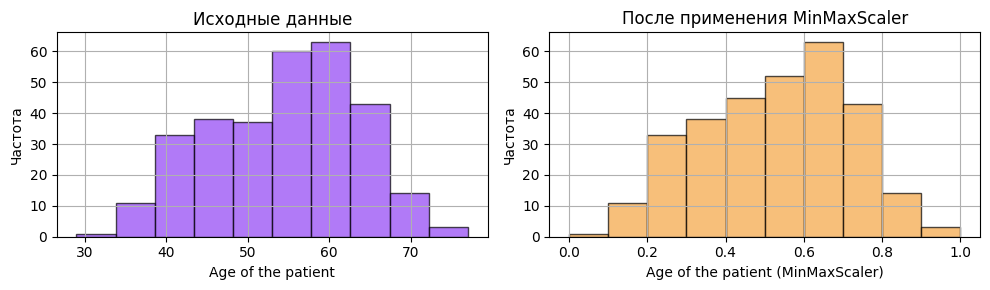

In [ ]:
X_source_row = [row[0] for row in X]
X_MinMaxScaler_row = [row[0] for row in X_MinMaxScaler]

show_hist_diff(X_source_row, "Исходные данные","Age of the patient",
               X_MinMaxScaler_row, "После применения MinMaxScaler", "Age of the patient (MinMaxScaler)" )

**Вывод:** все значения признаков находятся в диапазоне от 0 до 1, где каждое значение представляет собой относительное положение признака в исходных данных

## 8 . Стандартизацию факторных признаков (StandardScaler)

Для того, чтобы сделать стандартизацию данных нужно посчитать в каждом признаке его среднее значение (`mean`) и стандартное отклонение (`std`), а затем сделать следующее вычисление:

$$x = \frac{x - mean}{std}$$

После такого преобразования $mean = 0, std = 1$.

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_standardized = scaler.transform(X)
print(X_standardized[0:5,:8])

[[ 0.952  0.681  1.973  0.764 -0.256  2.394 -1.006  0.015]
 [-1.915  0.681  1.003 -0.093  0.072 -0.418  0.899  1.633]
 [-1.474 -1.468  0.032 -0.093 -0.817 -0.418 -1.006  0.978]
 [ 0.18   0.681  0.032 -0.664 -0.198 -0.418  0.899  1.24 ]
 [ 0.29  -1.468 -0.939 -0.664  2.082 -0.418  0.899  0.584]]


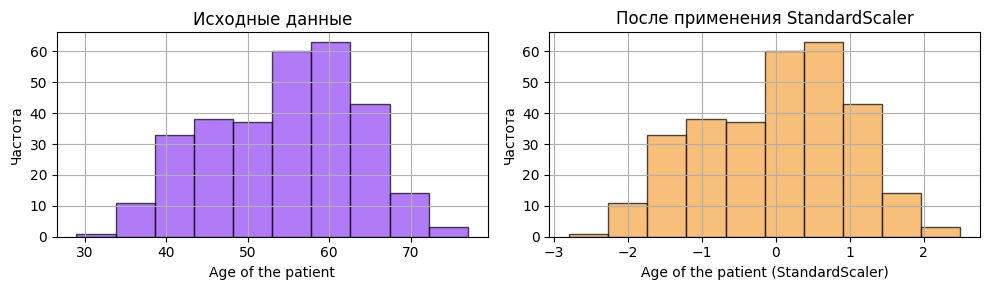

In [ ]:
X_standardized_row = [row[0] for row in X_standardized]

show_hist_diff(X_source_row, "Исходные данные", "Age of the patient",
               X_standardized_row, "После применения StandardScaler", "Age of the patient (StandardScaler)")

**Вывод:** после стандартизации данных, мы получаем признаки, у которых среднее значение равно 0, а стандартное отклонение равно 1

## 9 . Нормализация факторных признаков (Normalizer)

In [ ]:
normaler = Normalizer().fit(X)
X_Normalizer = normaler.fit_transform(X)
print(X_Normalizer[0:1,:])

[[0.197 0.003 0.009 0.454 0.73  0.003 0.    0.47  0.    0.007 0.    0.
  0.003]]


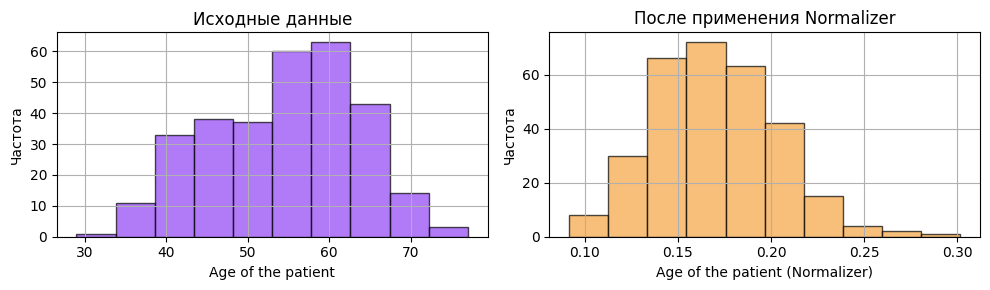

In [ ]:
X_Normalizer_row = [row[0] for row in X_Normalizer]
show_hist_diff(X_source_row, "Исходные данные", "Age of the patient",
               X_Normalizer_row, "После применения Normalizer", "Age of the patient (Normalizer)")

In [ ]:
import numpy as np
X_np = np.array(X_Normalizer)

column_index = 3
column_sum = np.sum(X_np[1, :])
column_sum

1.803162384514707

**Вывод:** Normalizer - это полезный инструмент для нормализации данных, который приводит каждую строку набора данных к единичной норме,

## 10 . Бинарное кодирование факторных признаков

In [ ]:
binarizer = Binarizer(threshold=0.0).fit(X)
rescaledX = binarizer.fit_transform(X)
print(rescaledX[0:5,:])

[[1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.]
 [1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1.]
 [1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.]
 [1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.]]


**Вывод:** каждая строка в исходном наборе данных была бинаризована в соответствии с заданным порогом, и результат показывает, какие признаки были выше порога (1) и какие - ниже порога (0)

# Раздел 2

## 11 . Отбор признаков на основе F-критерия в дисперсионном анализе

In [ ]:
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X,Y)
print(fit.scores_)

[16.117 25.792 69.772  6.458  2.203  0.237  5.777 65.12  70.952 68.551
 40.902 54.56  40.408]


**Вывод:** результат вывода - это значения оценок (scores), вычисленные для каждого признака. Эти оценки представляют степень влияния каждого признака на переменную, которую мы пытаемся предсказать (метки классов). Чем выше оценка, тем важнее признак для классификации.

## 12 .	Преобразуйте факторные признаки с помощью функции transform()

In [ ]:
X_selected = fit.transform(X)
print(X_selected[0:5, :])

[[  3.  150.    0.    2.3]
 [  2.  187.    0.    3.5]
 [  1.  172.    0.    1.4]
 [  1.  178.    0.    0.8]
 [  0.  163.    1.    0.6]]


**Вывод:** Каждая строка в X_selected содержит 4 признака, которые были выбраны как наиболее важные

## 13-18. Рекурсивное исключение наименее значимых признаков до тех пор, пока не останется 3 признака

In [ ]:
# 13
model = LogisticRegression()

# 14
rfe = RFE(model, n_features_to_select=3)

# 15
fit = rfe.fit(X, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
# 16
print("Число отобранных признаков:", fit.n_features_)

# 17
print("Отобранные признаки:", fit.support_)

# 18
print("Ранги признаков:", fit.ranking_)

Число отобранных признаков: 3
Отобранные признаки: [False  True False False False False False False  True False  True False
 False]
Ранги признаков: [10  1  4  8 11  9  6  7  1  5  1  3  2]


**Вывод:**
всего было выбрано 3 наиболее значимых признака:
- пол,
- Slope,
- Thalium Stress Test result.

Ранги признаков расположены в порядке их важности. Наиболее важные признаки имеют меньшие ранги.

## 19

In [ ]:
# 19
X_rfe = rfe.transform(X)
print(X_rfe[:5])

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 2.]
 [1. 0. 2.]
 [0. 1. 2.]]


**Вывод:** в этой матрице каждая строка соответствует наблюдению (пациенту), а каждый столбец - одному из отобранных признаков

## 20-24  Проводим отбор 3-х главных компонент

In [ ]:
pca = PCA(n_components=3)
pca.fit(X)
explained_variance = pca.explained_variance_ratio_
print("Доля объясненной дисперсии:", explained_variance)

Доля объясненной дисперсии: [0.748 0.15  0.085]


**Вывод:** Первая компонента объясняет примерно 74.8% общей дисперсии данных, вторая компонента объясняет примерно 15%, а третья компонента объясняет около 8.5%

In [ ]:
np.set_printoptions(suppress=True)
components = pca.components_
print("Компонентные нагрузки:\n", components)

Компонентные нагрузки:
 [[ 0.039 -0.002 -0.002  0.048  0.998  0.    -0.002 -0.007  0.001  0.001
  -0.     0.001  0.001]
 [ 0.182  0.001 -0.013  0.104 -0.019  0.    -0.001 -0.977  0.008  0.018
  -0.01   0.01   0.003]
 [ 0.126 -0.001  0.006  0.982 -0.051  0.004 -0.003  0.129 -0.     0.009
  -0.002  0.004  0.001]]


**Вывод:**

Компонентные нагрузки представляют, какие исходные признаки (переменные) вносят вклад в каждую главную компоненту. Это позволяет понять, какие исходные признаки сильнее всего влияют на главные компоненты и какие признаки можно использовать для сокращения размерности данных

- Первая строка. Наибольший вклад (0.998) вносит признак с индексом 5 (`fbs`);
- Вторая строка. Наибольший вклад (-0.977) вносит признак с индексом 7 (`thall`).

## 25-27: Классификатор дополнительных деревьев для отбора признаков

In [ ]:
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, Y)
feature_importance = model.feature_importances_
print("Значения критерия информативности:", feature_importance)

Значения критерия информативности: [0.071 0.055 0.129 0.061 0.059 0.021 0.034 0.085 0.091 0.088 0.075 0.122
 0.108]


**Вывод:** Чем выше значение критерия информативности, тем более важен признак для задачи классификации. В данном случае, признаки с более высокими значениями, такие как 2, 11 и 12, считаются более важными для классификации по сравнению с другими признаками